# Approche Interdisciplinaire pour la Sciences des Données

## Introduction à la visualisation de données biologiques massives à l'aide du language PYTHON 

## Application à des analyses de données de transcriptomique


### Ecole Supérieure de Biotechnologie de Strasbourg

### Bruno KIEFFER 

### Décembre 2023


Les données de transcriptomique sont généralement contenues dans des fichiers de type texte, structurés en tableaux. Nous allons aborder 2 exemples:

- Les premières données de transcriptomique étaient obtenues par des expériences d'hybridation sur des puces à ADN (machines Affymetrix). La lecture de l'intensité d'expression consistait en une intensité de fluorescence (proportionnelle au nombre de molécules de RNA fixées sur un oligonucléotide avec une séquence représentative d'un gène spécifique sur la puce).
- Aujourd'hui, les puces à ADN ont été remplacées par les méthodes de séquençage des ARN totaux contenus dans un échantillons (RNAseq), une technique développée grâce aux progrès des méthodes de séquençage (NGS par les machines Illumina par exemple).

## 3.1 Analyse de données transcriptomiques issues d'une puce ADN

Le fichier **microarray_data.txt** contient des données d'expression génique au cours du développement du poisson zèbre. Ces données proviennent d'une expérience d'hybridation sur une puce à ADN. Le fichier contient des données (au format texte) organisées en colonnes, séparées par un caractère tabulation.

### Importation des données et validation

La commande suivante permet d'importer ce tableau dans un objet DataFrame de pandas :


In [1]:
# Lecture d'un fichier texte dans un DataFrame Pandas
# Attention à bien specifier le chemin d'acces (le repertoire) du fichier

import pandas as pd

nom_fichier = "microarray_data.txt"

exprs_data = pd.read_csv(nom_fichier,sep='\t',index_col="GenesTRanscripts")

### Question 3.1

    - Quelles sont les dimensions du tableau ?
    - Quels sont les intitulés des colonnes, a quoi cela correspond t'il ?
    (on utilisera la méthode keys())
    - Calculer la moyenne des valeurs de chaque colonne du tableau 
    - Comparer la déviation standard de chaque colonne du tableau (en utilisant la méthode std())

Quelles conclusions pouvez-vous en déduire ?

### Représentation graphique globale des données

La première étape consiste à examiner les données dans leur ensemble. Pour cela, on utilisera une représentation de type "heatmap" afin d'avoir une vue globale des données. Ces données seront au préalable transformées en prenant le logarithme base 2 de chaque valeur.

### Question 3.2

    - Pouvez-vous identifier des situations remarquables à partir de cette représentation ?
    - Que pouvez-vous dire sur les 6 premières colonnes à partir de la heatplot map ?
    - Essayez de représenter les valeurs avec d'autres échelles de couleurs
    - Pourquoi représente t'on le logarithme des valeurs plutôt que la valeur ?

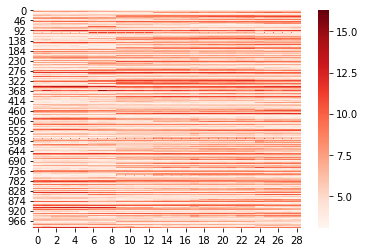

In [12]:
import matplotlib.pyplot as plt # la bibliotheque de dessins
from matplotlib import colors # Charge la palette des couleurs
import numpy as np # la bibliotheque pour calculer 
import seaborn as sns  # Bibliothèque permettant de tracer facilement des heatmaps

fig, axs = plt.subplots()  # Creation d'un espace graphique fig et asx sont des objets permettant de modifier l'aspect des graphes

data = np.array(exprs_data) # Transforme l'objet DataFrame de pandas en une matrice numpy pour le calcul
# Calcul le logarithme des valeurs de tous le tableau : A compléter
data_log = 

sns.heatmap(data_log, cmap="Reds")
plt.show()

### Analyse des réplicats

Plusieurs pistes de la puce ADN correspondent à des réplicats, c'est-à-dire que la préparation de RNA a été réalisée plusieurs fois dans les mêmes contitions. C'est le cas des colonnes X2cell_1 et X2cell_6 de la puce étudiée. Un contrôle indispensable consiste donc à comparer la dispersion des valeurs entre les différents réplicats.

Le contrôle le plus simple consiste à tracer les valeurs obtenues sur une des pistes en fonction d'une autre piste. On parle de diagramme de corrélation. On peut également calculer un coefficient de correlation qui nous donne une mesure de la corrélation entre les deux jeux de valeurs.

### Question 3.3

    - En utilisant le script ci-dessous, comparez les valeurs contenues dans les colonnes X2cell_1 et X2cell_6. Que pouvez-vous en conclure ?
    - Y a t'il une paire de colonnes de X2cell_1 à X2cell_6 dont les valeurs paraissent plus corrélées que d'autres ?

Le coefficient de corrélation (Pearson) est :  0.8613069083864112


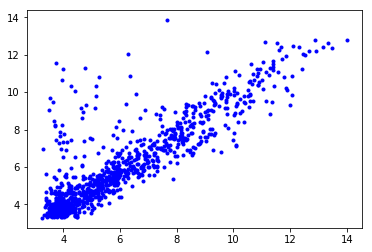

In [10]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np

import scipy.stats as st # bibliotheque contenant des fonctions de statistique

fig, axs = plt.subplots()

X = data_log[:,1]    # Selection des valeurs sur l'axe des x
Y = data_log[:,6]    # Selection des valeurs sur l'axe des y
p = axs.plot(X,Y,'.b')
print ("Le coefficient de corrélation (Pearson) est : ",st.pearsonr(X, Y)[0])
plt.show()

### Calcul de distances

Une autre façon de mesurer l'écart entre les différents jeux de valeurs consiste à mesurer une distance mathématique entre les différents jeux de valeurs. Différents types de distances existent (euclidienne, Manhattan etc ..). Le script ci-dessous permet de visualiser la matrice des distances entre toutes les pistes de la puce.

### Question 3.4

    - Que pouvez-vous dire sur la structure de la matrice de distance ?
    - Quelles sont les valeurs obtenues sur la diagonale ?
    - Quelle est la différence entre la distance euclidienne et "cityblock"
    

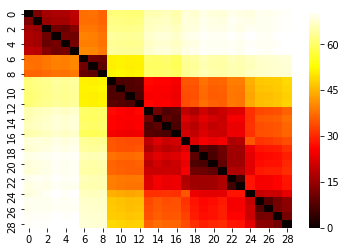

In [14]:
# Calcul des distances entre les différentes pistes
import scipy.spatial.distance as di # Bibliotheque permettant le calcul de distances

from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


nom_fichier = "microarray_data.txt"

exprs_data = pd.read_csv(nom_fichier,sep='\t',index_col="GenesTRanscripts")
data = np.log2(np.array(exprs_data))

fig, axs = plt.subplots()

# Calcul des distances
dists = di.pdist(data.T,metric='euclidean')
#dists = di.pdist(data.T,metric='cityblock')


dists = di.squareform(dists) # Transforme les valeurs en une matrice carree
sns.heatmap(dists, cmap="hot")
plt.show()

### Analyse des distributions des valeurs (I)

Un élément essentiel de l'analyse de données à haut débit est la loi de distribution des valeurs. Cette loi est rarement une loi normale. Trouver le bon modèle pour une loi de distribution conditionne les analyses et les conclusions biologiques qui seront déduites des données.

Le script ci-dessous permet de visualiser les distributions des valeurs pour chaque piste.

### Question 3.5

    - Quelle est la caractéristique principale de la distribution ?

(0, 600)

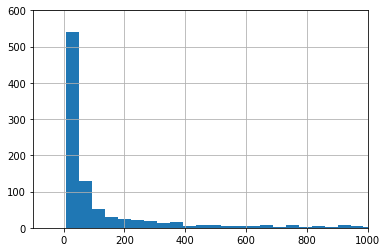

In [18]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np

nom_fichier = "microarray_data.txt"

exprs_data = pd.read_csv(nom_fichier,sep='\t',index_col="GenesTRanscripts")

fig, axs = plt.subplots()

exprs_data["X2cell_1"].hist(bins=300)
axs.set_xlim([-100,1000])
axs.set_ylim([0,600])

### Analyse des distributions des valeurs (II)

Nous allons maintenant comparer les distributions des différentes expériences présentes sur la puce. Pour cela, on va préalablement fusionner les différents réplicats. Cette fusion illustre la manipulation des tableaux à l'aide de pandas.

### Question 3.6

    - Que fait la fonction melt ci-dessous ? (regarder la structure du DataFrame b)
    - compléter le script pour construire un tableau data (numpy array) comprenant les log2 des valeurs d'expression pour les différentes expériences 
    - Comment se comparent les différentes distributions ?

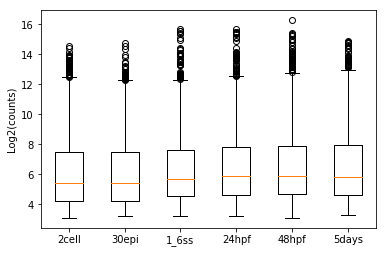

In [19]:
import matplotlib.pyplot as plt
import numpy as np

nom_fichier = "microarray_data.txt"
exprs_data = pd.read_csv(nom_fichier,sep='\t')  # On lit les donnees sans attribuer une colonne index

exprs_data['index']=exprs_data.index
b = exprs_data.melt(id_vars=['index']) # Fusion du tableau en gardant la colonne GenesTRanscripts
b["exp"] = ""  # Ajout d'une colonne contenant une chaine de caracteres vide
b.exp = b.variable.str[1:6] # la colonne "exp" contient les caracteres 1 a 5 de la colonne "variable"
exp_list = b["exp"].drop_duplicates() # Cherche les identifiants uniques de la colonne "exp"

fig, ax = plt.subplots()

# Construit un objet numpy contenant les differentes experiences organisees en colonnes
# A compléter


ax.boxplot(data)
ax.set_xticklabels(exp_list)
ax.set_ylabel("Log2(counts)")
plt.show()


In [22]:
exp_list

0        2cell
5994     30epi
8991     1_6ss
12987    24hpf
17982    48hpf
23976    5days
Name: exp, dtype: object

### Identification des gènes

Dans les données provenant de la puce ADN, les gènes sont identifiés à l'aide d'un code attribué par la banque ENSEMBL, qui répertorie les données de génomique. Le nom et les informations relatives à la protéine codée par le transcrit doivent être retrouvées en utilisant des liens entre les banques.
Le fichier **interpro.txt** contient un tableau permettant de faire correspondre l'identifiant d'un transcrit avec l'identifiant de la protéine correspondante dans la banque UNIPROT.

### Question 3.7

    - Quelle est la structure du tableau interpro ?
    - Identifiez la colonne contenant l'identifiant des transcrits
    - Que fait la commande merge ?
    - Est-ce que l'on a une protéine unique par transcrit ?
    - Combien de protéines sont testées par la puce ADN ?

In [25]:
# Lecture des donnees de la puce
nom_micro = "microarray_data.txt"
exprs_data = pd.read_csv(nom_micro,sep='\t',index_col="GenesTRanscripts")

# Recherche d'information sur les genes
nom_interpro = "interpro.txt"

interpro = pd.read_csv(nom_interpro,sep='\t')
interpro = interpro.set_index("Ensembl Transcript ID") 

gene = pd.merge(exprs_data,interpro,left_index=True,right_index=True,how='inner')


### Identification des gènes differentiellement exprimés

Afin d'identifier les gènes différentiellement exprimés, on calcul un rapport entre une valeur d'expression mesurée dans une condition de référence avec celle obtenue pour une autre condition (dans l'exemple ci-dessous, on prend un temps de référence 24H et on compare avec l'expression à 48H). On prend le logarithme base 2 de ce rapport pour obtenir un nombre, soit positif (pour une expression augmentée) soit négatif (pour une expression réprimée). On désigne cette valeur sous le nom anglais de "Log fold change" (lfc). Un gène avec un lfc de 2 est un gène qui est 4 fois plus exprimé dans les conditions d'étude par rapport aux conditions de référence.

In [54]:
# Calcul des valeurs moyennes
gene['48H'] = gene.X48hpf_1 + gene.X48hpf_2 + gene.X48hpf_3 + gene.X48hpf_4 + gene.X48hpf_5 + gene.X48hpf_6
gene['48H'] = gene['48H']/6
gene['24H'] = gene.X24hpf_1 + gene.X24hpf_2 + gene.X24hpf_3 + gene.X24hpf_4 + gene.X24hpf_5
gene['24H'] = gene['24H']/5

# Calcul d'une expression différentielle
gene['expr_diff'] = np.log2(gene['48H']/gene['24H'])

# Liste des gènes différentiellement sur-exprimés
up = gene[gene['expr_diff'] > 1.]
up = up.sort_values('expr_diff',ascending=False)
up[['Interpro Short Description','expr_diff']].head()

,Interpro Short Description,expr_diff
ENSDART00000037879,Homeodomain,4.020060
ENSDART00000037879,Otx_TF,4.020060
ENSDART00000037879,Homeodomain-like,4.020060
ENSDART00000037879,Otx_TF_C,4.020060
ENSDART00000063835,Otx_TF_C,2.975531


### 3.2 Analyse d'une expression différentielle de gènes à partir de données de RNAseq

Nous allons maintenant analyser des données issues de séquençage à haut-débit (RNAseq) issues d'un jeu de données publié en 2018 sur le cancer de la prostate. La cible moléculaire principale de ce cancer est le récepteur hormonal nucléaire aux hormones androgènes (Dihydrotestostérone). L'objectif de l'étude était d'identifier la réponse de cellules modèles exprimant AR à une molécule anti-androgène, le Darolutamide.

Dans un premier temps, nous examinerons la nature des données brutes contenues dans le fichier 

**GSE148397_VCaP_22h.csv**

Les données ont été téléchargées à partir du site [GEO database](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE148397).


### Question 3.8

Ouvrez le fichier à l'aide de pandas et examinez son contenu.
Que signifient : 

    - le nom des colonnes ?
    - les nombres contenus dans chaque ligne ?
    - Quelle est l'allure de la distribution des nombres ?
    - A partir de l'intitulé des colonnes, identifier les différentes conditions expérimentales utilisées pour l'expression

In [4]:
import pandas as pd

nom_fichier = "data/GSE148397_VCaP_22h.csv"

reads_data = pd.read_csv(nom_fichier,sep='\t')

In [59]:
reads_data.head()

,Gene_name,VCaP_DMSO_DMSO_22h_rep1,VCaP_DMSO_DMSO_22h_rep2,VCaP_DMSO_DMSO_22h_rep3,VCaP_DMSO_DMSO_22h_rep4,VCaP_DMSO_DMSO_22h_rep5,VCaP_DMSO_DMSO_22h_rep6,VCaP_DMSO_DMSO_22h_rep7,VCaP_DMSO_DMSO_22h_rep8,VCaP_R1881_Daro_2uM_22h_rep1,...,VCaP_R1881_Daro_2uM_22h_rep5,VCaP_R1881_DMSO_22h_rep1,VCaP_R1881_DMSO_22h_rep2,VCaP_R1881_DMSO_22h_rep3,VCaP_R1881_DMSO_22h_rep4,VCaP_R1881_DMSO_22h_rep5,VCaP_R1881_DMSO_22h_rep6,VCaP_R1881_DMSO_22h_rep7,VCaP_R1881_DMSO_22h_rep8,VCaP_R1881_DMSO_22h_rep9
0,DDX11L1,15,25,21,10,14,12,12,18,7,...,10,12,9,13,9,8,6,17,7,16
1,WASH7P,97,164,159,86,135,125,120,125,129,...,107,106,157,65,123,103,78,118,119,128
2,MIR6859-1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,3
3,RP11-34P13.3,2,1,0,0,1,2,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,MIR1302-2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Traitement statistique des données de séquençage

Afin de pouvoir être interprétées, les données sont traitées par un ensemble de scripts R, regroupés dans un "package" appelé [DESeq2](http://bioconductor.org/packages/devel/bioc/vignettes/DESeq2/inst/doc/DESeq2.html). (Love M., Huber W. et Anders S, Genome Biology (2014) 15:550).

A l'issu de ce traitement, les données sont normalisées et une valeur de log2FoldChange (LFC) est calculée pour chaque gène, ainsi que des indicateurs statistiques, comme la p-value ou la moyenne.

Les deux données essentielles sont :

- log2FoldChange : pour un gène donné, le rapport logarithmique des expressions dans chaque condition
- padj : une probabilité pour que le rapport observé soit dû au hasard 

Les données traitées par DESeq2 pour une condition sont contenues dans un fichiers csv:

- res_R1881_DMSO_LFC.txt

### Question 3.9

    - Quelles sont les dimensions du tableau ?
    - Construire un nouveau tableau en supprimant les lignes vides (NaN) à l'aide de la fonction dropna()
    - Combien de données "valides" sont disponibles ?

In [14]:
# Read DESeq2 results
VCaP_R1881_DMSO=pd.read_csv("data/res_R1881_DMSO_LFC.txt", sep="\t")

VCaP_R1881_DMSO.head()

,baseMean,log2FoldChange,lfcSE,pvalue,padj
DDX11L1,12.570532,-0.426114,0.249658,0.068874,0.105254
WASH7P,115.970557,-0.121567,0.110308,0.264902,0.342710
MIR6859-1,0.286547,0.078797,0.706239,0.748128,NaN
RP11-34P13.3,0.445464,-0.595263,0.944168,0.172504,0.236733
MIR1302-2,0.000000,NaN,NaN,NaN,NaN


In [15]:
VCaP_R1881_DMSO_na = VCaP_R1881_DMSO.dropna()

### Visualisation globale des données à l'aide de Volcano Plots

Les diagrammes Volcano sont utilisés pour visualiser gmlobalement le résultat d'une expérience d'expression différentielle. Ce diagramme représente la valeur du LogFold change sur l'axe des abcisses (X) et la probabilité que cette valeur soit fortuite (p-value) sur l'axe des ordonnées (sous la forme de -log(p-value)).

### Question 3.10

    - Modifier le script ci-dessous pour faire apparaitre les gènes réprimés en rouge et les gènes activés en bleu. On considère un gène activé si son lfc est supérieur à 1.5 et une p-value inférieure à 0.05
    - Selon ces critères, combiens de gènes sont activés et réprimés dans les deux conditions ?

Note : Une sélection multiple est réalisée par l'expression suivante :

    df.loc[(df['log2FoldChange'] >= 1.5) & (df['padj']< 0.05)]

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


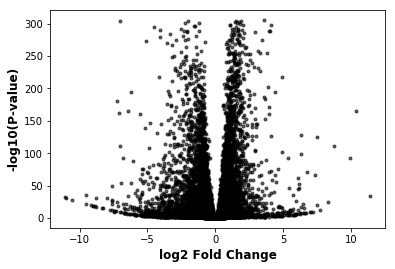

In [27]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()  # Creation d'un espace graphique fig et asx sont des objets permettant de modifier l'aspect des graphes

data = VCaP_R1881_DMSO_na

# Calcul du -log(p-value)
data.loc[:,["logpv"]] = -np.log10(data['padj'])

ax.scatter(data['log2FoldChange'],data['logpv'],c='black', linewidths=1, marker=".", alpha=0.6)
ax.set_xlabel('log2 Fold Change', fontsize=12, fontname="sans-serif", fontweight="bold")
ax.set_ylabel('-log10(P-value)', fontsize=12, fontname="sans-serif", fontweight="bold")
plt.show()

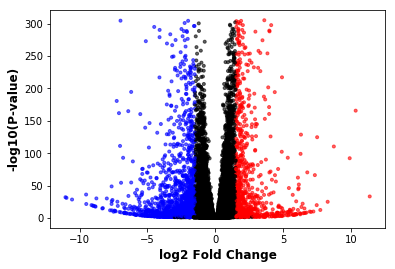

In [29]:
# Answer
fig, ax = plt.subplots()  # Creation d'un espace graphique fig et asx sont des objets permettant de modifier l'aspect des graphes

data.loc[:,['color']] = 'black'

data.loc[(data['log2FoldChange'] >= 1.5) & (data['padj']< 0.05),['color']] = 'red'
data.loc[(data['log2FoldChange'] <= -1.5) & (data['padj']< 0.05),['color']] = 'blue'

ax.scatter(data['log2FoldChange'],data['logpv'],c=list(data['color']), linewidths=1, marker=".", alpha=0.6)
ax.set_xlabel('log2 Fold Change', fontsize=12, fontname="sans-serif", fontweight="bold")
ax.set_ylabel('-log10(P-value)', fontsize=12, fontname="sans-serif", fontweight="bold")
plt.show()

### Contrôle qualité d'une expérience RNAseq

Une des difficultés de l'analyse à haut débit est de trouver des critères permettant de juger de la qualité du jeu de données. Les critères statistiques globaux (par exemple la p-value) ne permettent pas de juger de la qualité de l'ensemble de l'expérience, mais uniquement de la mesure de l'expression. Une façon d'y parvenir est de suivre notamment un ensemble de gènes connus pour être dépendants du facteur de transcription étudié.

Ici, nous utiliserons des gènes dépendants de l'AR qui ont été identifiés par des expériences sur les biopuces. Nous allons superposer ces gènes sur le graphique du volcan ci-dessus.

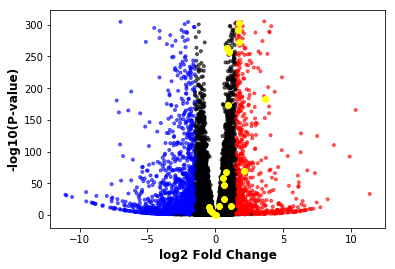

In [35]:
gene_nelson =["KLK3","KLK2","TMPRSS2","B2M", "NKX3-1","DHCR24","TPD52",
           "ADAMTS1", "UNC13A", "STK39", "SORD", "KRT18", "NDRG1", "PMEPA1",
           "PHYH", "KLK4", "CAMKK2", "TSC22D1", "ADRM1", "ACSL3", "ACTN1",
           "PJA2", "MYL12A", "UGDH", "AZGP1", "RAB4A", "ANKH", 'RDH11',
           "SEPP1", "HES6"]

# Recopie de l'index dans une colonne 'Gene_name
data.loc[:,['Gene_name']] = data.index
    
nelson = pd.DataFrame(gene_nelson,columns=['Gene_name'])
inter = pd.merge(data, nelson, how='inner')

fig, ax = plt.subplots()  # Creation d'un espace graphique fig et asx sont des objets permettant de modifier l'aspect des graphes

data.loc[:,['color']] = 'black'

data.loc[(data['log2FoldChange'] >= 1.5) & (data['padj']< 0.05),['color']] = 'red'
data.loc[(data['log2FoldChange'] <= -1.5) & (data['padj']< 0.05),['color']] = 'blue'

ax.scatter(data['log2FoldChange'],data['logpv'],c=list(data['color']), linewidths=1, marker=".", alpha=0.6)
ax.scatter(inter['log2FoldChange'],inter['logpv'],c='yellow', linewidths=1, marker="o", alpha=1.0)
ax.set_xlabel('log2 Fold Change', fontsize=12, fontname="sans-serif", fontweight="bold")
ax.set_ylabel('-log10(P-value)', fontsize=12, fontname="sans-serif", fontweight="bold")
plt.show()
